In [1]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Step 1: Load the cleaned dataset
df = pd.read_csv("Dataset/3 Balanced_Predictive_Maintenance.csv")

# Step 2: Drop non-predictive features
df = df.drop(columns=['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Process temperature [K]'])

In [3]:
# Setup PyCaret for classification
clf = setup(data=df,
            target='Machine failure',
            session_id=84,
            normalize=True,
            remove_multicollinearity=True,
            multicollinearity_threshold=0.9,
            fold=20,
            fold_strategy='kfold',
            fix_imbalance=True,
            verbose=False)  # silent removed, use verbose=False

In [4]:
'''
for col in ['Type', 'Machine failure']:
    df[col].value_counts().plot(kind='bar', title=f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
'''

'\nfor col in [\'Type\', \'Machine failure\']:\n    df[col].value_counts().plot(kind=\'bar\', title=f"Distribution of {col}")\n    plt.xlabel(col)\n    plt.ylabel("Count")\n    plt.show()\n'

In [5]:
# Step 3: Compare baseline models
top_5_models = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9958,1.0000,1.0000,0.9916,0.9958,0.9916,0.9916,0.2190
rf,Random Forest Classifier,0.9911,1.0000,1.0000,0.9824,0.9911,0.9821,0.9823,0.3510
dt,Decision Tree Classifier,0.9898,0.9898,1.0000,0.9799,0.9899,0.9796,0.9798,0.0415
lightgbm,Light Gradient Boosting Machine,0.9845,0.9973,1.0000,0.9699,0.9847,0.9689,0.9694,0.1890
knn,K Neighbors Classifier,0.9720,0.9886,1.0000,0.9469,0.9727,0.9439,0.9454,0.0685
gbc,Gradient Boosting Classifier,0.9519,0.9849,0.9781,0.9297,0.9532,0.9038,0.9052,0.3450
ada,Ada Boost Classifier,0.9106,0.9658,0.9089,0.9121,0.9102,0.8210,0.8214,0.1610
nb,Naive Bayes,0.8260,0.9059,0.7912,0.8503,0.8193,0.6515,0.6535,0.0375
qda,Quadratic Discriminant Analysis,0.8050,0.9066,0.7145,0.8728,0.7853,0.6097,0.6204,0.0410
ridge,Ridge Classifier,0.8020,0.8839,0.7805,0.8156,0.7972,0.6036,0.6047,0.0365


In [6]:
# Step 4: Tune each model and find the best tuned one
#tuned_models = [tune_model(model, optimize='F1',n_iter=30, fold=10) for model in top_5_models]

In [7]:
best_tuned_model = top_5_models[1]

In [8]:
# Step 5: Finalize the best tuned model
final_model = finalize_model(best_tuned_model)

In [9]:
custom_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [10]:
tuned_model = tune_model(final_model, custom_grid = custom_grid_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,1.0000,1.0000,0.9919,0.9959,0.9911,0.9911
1,0.9911,1.0000,1.0000,0.9834,0.9916,0.9822,0.9824
2,0.9956,1.0000,1.0000,0.9912,0.9956,0.9911,0.9912
3,0.9926,1.0000,1.0000,0.9853,0.9926,0.9852,0.9853
4,0.9911,1.0000,1.0000,0.9817,0.9908,0.9822,0.9824
5,0.9941,1.0000,1.0000,0.9889,0.9944,0.9881,0.9882
6,0.9956,1.0000,1.0000,0.9909,0.9954,0.9911,0.9912
7,0.9926,1.0000,1.0000,0.9853,0.9926,0.9852,0.9853
8,0.9985,1.0000,1.0000,0.9970,0.9985,0.9970,0.9970


Fitting 20 folds for each of 10 candidates, totalling 200 fits


In [11]:
save_model(final_model, 'best_machine_failure_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air temperature [K]',
                                              'Rotational speed [rpm]',
                                              'Torque [Nm]', 'Tool wear [min]'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Transformer...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
        

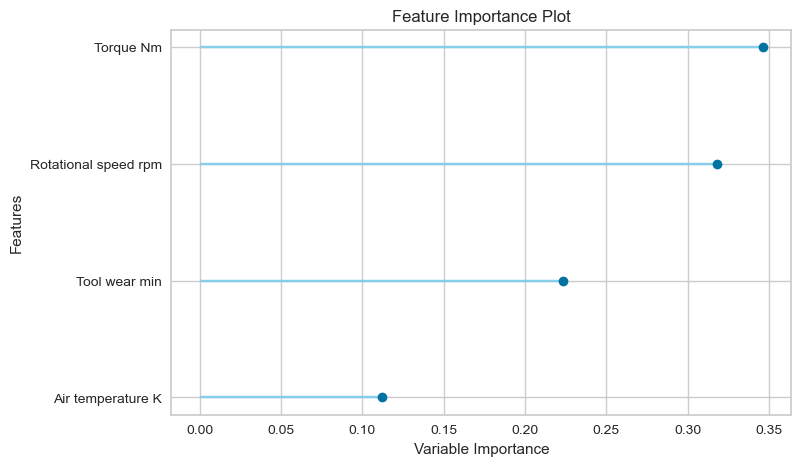

In [12]:
from pycaret.classification import plot_model

# Show feature importance for the tuned model
plot_model(final_model, plot='feature')
